## Load data

In [1]:
import numpy as np
import pandas as pd

import glob

In [2]:
data_root = '/home/c44406/datasets/atb_uofa/loan_portfolio/'
datasets_paths = glob.glob(f'{data_root}datasetv5*.csv')

In [3]:
datasets_all = []
for dpath in datasets_paths:
    df = pd.read_csv(dpath, dtype={'dunning_level':'object'})
    datasets_all.append(df)

datasets = pd.concat(datasets_all, axis=0, ignore_index=True)

In [4]:
datasets.head()

,bus_ptnr_group,cal_day,naics_id,BRR,BEACON,dunning_level_code,dunning_level,days_in_arrears,impaired,Oustanding_principle_on_posting_date,...,transaction_type_LOC_Disburse_RealTime_Adv,transaction_type_Loan_Transfer,transaction_type_EOD_ODP_Trf_Funded_Acc,transaction_type_misc,mth_since_brr_update,defaults_3_months,defaults_6_months,defaults_9_months,defaults_12_months,has_loan
0,479526,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,108.87,108.87,75.30,9480.53,NaN,NaN,NaN,NaN,NaN,False
1,395618,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,1072.73,67.34,NaN,NaN,NaN,NaN,0.0,False
2,393044,2014-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1026.45,1026.45,3126.22,3010.76,NaN,0.0,0.0,0.0,0.0,False
3,407671,2014-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3946.65,3946.65,405.80,3918.07,NaN,NaN,0.0,0.0,0.0,False
4,2211207,2017-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.32,44.32,13.15,1645.94,NaN,NaN,NaN,NaN,NaN,False


In [5]:
datasets.shape

(1952724, 50)

In [6]:
tmp = datasets.dtypes
tmp[tmp != 'float64']

bus_ptnr_group     int64
cal_day           object
dunning_level     object
has_loan            bool
dtype: object

In [7]:
non_numeric_cols = ['cal_day', 'dunning_level']

## Try UMAP

In [2]:
import umap
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

import umap.plot
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [9]:
num_tops = int(0.1 * len(datasets))
data_tops = datasets.loc[:num_tops, datasets.columns.difference(non_numeric_cols)].values

### Scaling

In [10]:
mask_imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)
pre_steps = [
    ('masking', mask_imp),
    ('scaling', StandardScaler())
]
pre_ppl = Pipeline(pre_steps)

In [11]:
scaled_data_tops = pre_ppl.fit_transform(data_tops)

In [35]:
mapper_0 = umap.UMAP(
    n_neighbors=75,
    min_dist=0.1,
#     metric='cosine',
    random_state=42
)

In [ ]:
mapper_0.fit(scaled_data_tops)

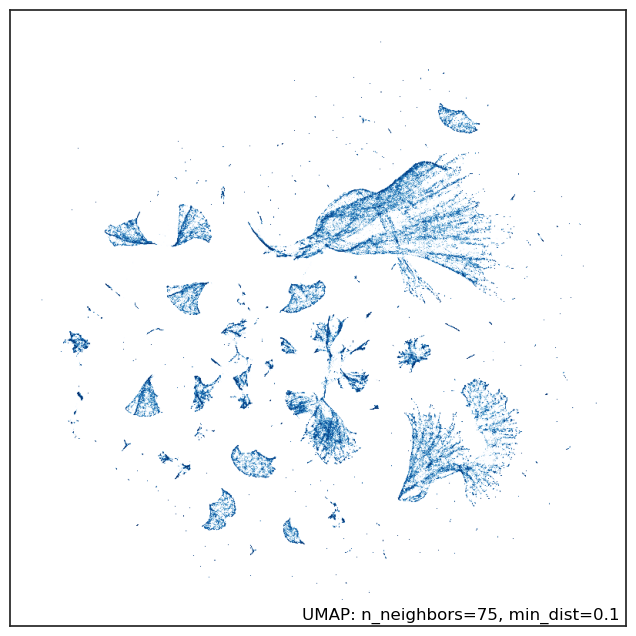

In [30]:
umap.plot.points(mapper_0);

In [31]:
embedding_0 = mapper_0.embedding_
embedding_0.shape

(195273, 2)

Text(0.5, 1.0, 'UMAP projection')

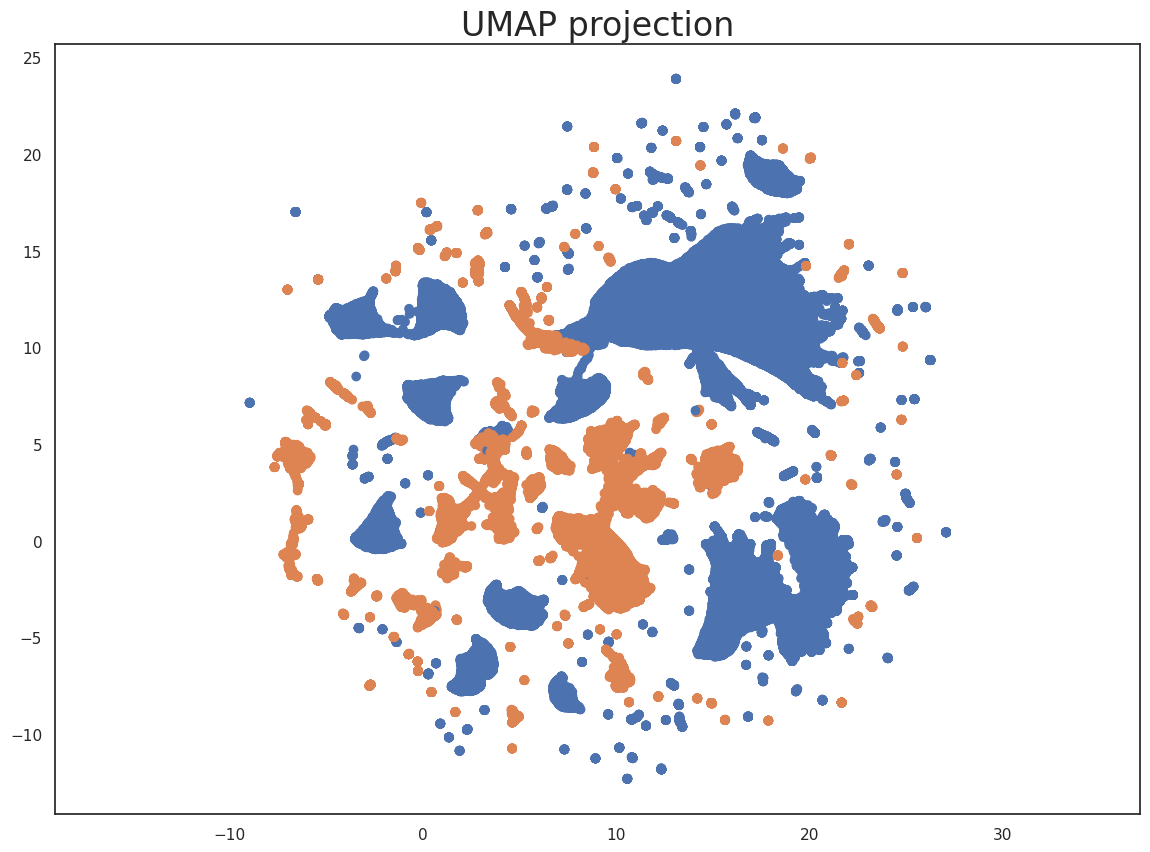

In [32]:
plt.scatter(
    embedding_0[:, 0],
    embedding_0[:, 1],
    c=[sns.color_palette()[x] for x in datasets.loc[:num_tops, 'has_loan']]
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection', fontsize=24)

### Not scaling

In [ ]:
mask_imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)
masked_data_tops = mask_imp.fit_transform(data_tops)

In [48]:
mapper_1 = umap.UMAP(
    n_neighbors=75,
    min_dist=0.1,
#     metric='cosine',
    random_state=42
)

In [ ]:
mapper_1.fit(masked_data_tops)

In [ ]:
umap.plot.points(mapper_1);

In [ ]:
embedding_1 = mapper_1.embedding_
embedding_1.shape

In [ ]:
plt.scatter(
    embedding_1[:, 0],
    embedding_1[:, 1],
    c=[sns.color_palette()[x] for x in datasets.loc[:num_tops, 'has_loan']]
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection', fontsize=24)

## UMAP

In [8]:
import umap
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

import umap.plot
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [9]:
data = datasets.loc[:, datasets.columns.difference(non_numeric_cols)].values

In [10]:
mask_imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)
pre_steps = [
    ('masking', mask_imp),
    ('scaling', StandardScaler())
]
pre_ppl = Pipeline(pre_steps)

In [11]:
scaled_data = pre_ppl.fit_transform(data)

In [12]:
scaled_data.shape

(1952724, 48)

In [13]:
mapper = umap.UMAP(
    n_neighbors=75,
    min_dist=0.1,
    random_state=42
)

In [ ]:
mapper.fit(scaled_data)

## Reduced by PCA

In [3]:
reduced_data = np.load('reduced_data.npy')

In [ ]:
mapper = umap.UMAP(
    n_neighbors=20,
    min_dist=0.1,
    metric='cosine',
    random_state=3024
)

mapper.fit(reduced_data)